In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A5 21171,7.2500,NaN,S
2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STONO2. 3101282,7.9250,NaN,S
4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [4]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df.dropna(subset = ['Embarked'], inplace = True)

### Univariate Analysis (Single Variable Analysis)

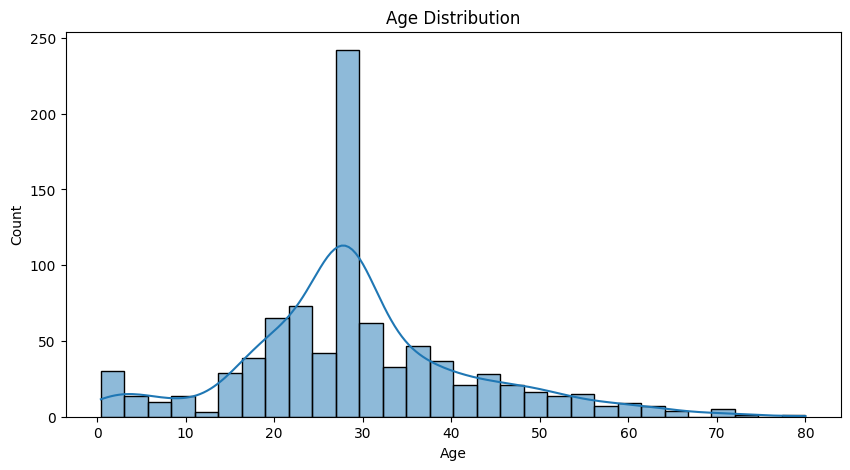

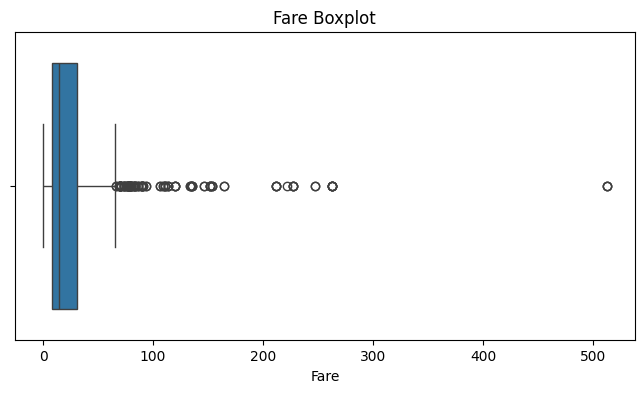

In [7]:
import matplotlib.pyplot as plt  
import seaborn as sns  

# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Boxplot for Outliers
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Fare'])
plt.title("Fare Boxplot")
plt.show()


C:\Users\sunny\AppData\Local\Temp\ipykernel_14252\3742180669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette="coolwarm")


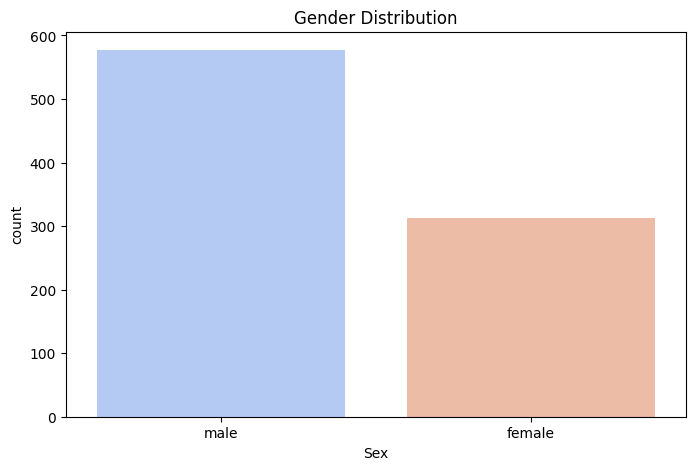

In [8]:
# Countplot
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', data=df, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()


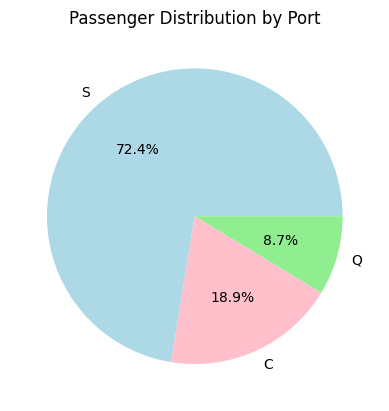

In [9]:
# Pie Chart for Embarked
df['Embarked'].value_counts().plot.pie(autopct="%1.1f%%", colors=['lightblue', 'pink', 'lightgreen'])
plt.title("Passenger Distribution by Port")
plt.ylabel('')
plt.show()


### Bivariate Analysis (Two-Variable Analysis)

C:\Users\sunny\AppData\Local\Temp\ipykernel_14252\3453006313.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, palette="coolwarm")


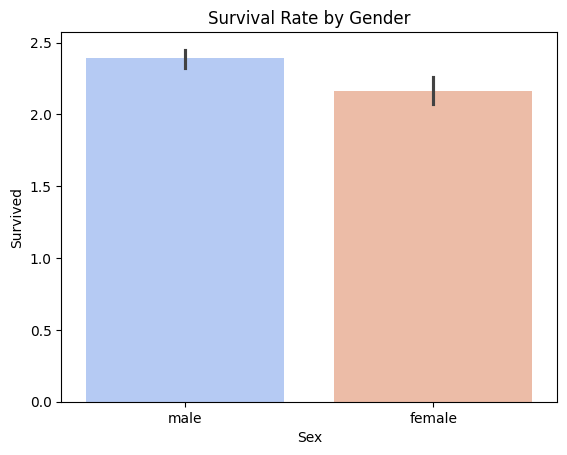

In [10]:
sns.barplot(x="Sex", y="Survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Gender")
plt.show()


C:\Users\sunny\AppData\Local\Temp\ipykernel_14252\1368876321.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="viridis")


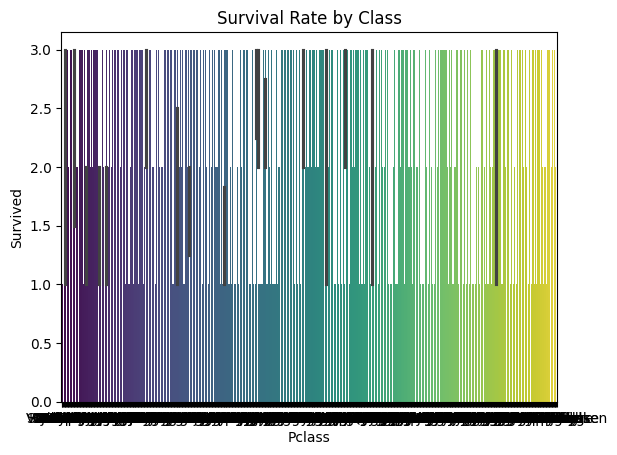

In [11]:
sns.barplot(x="Pclass", y="Survived", data=df, palette="viridis")
plt.title("Survival Rate by Class")
plt.show()


### Multivariate Analysis (Multiple Variables Together)

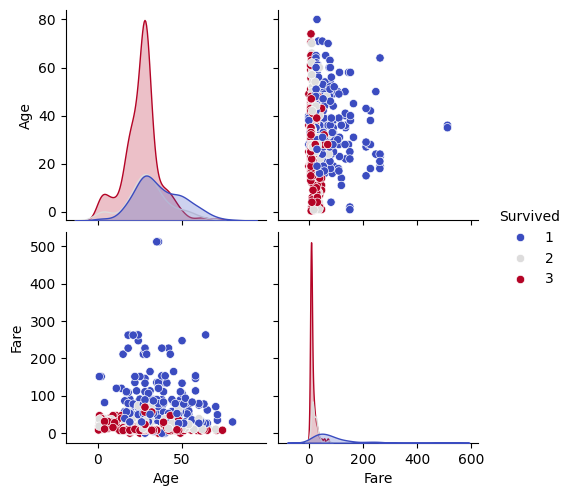

In [12]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue="Survived", palette="coolwarm")
plt.show()

### Outlier Detection

In [13]:
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter Outliers
df = df[(df["Fare"] >= lower_bound) & (df["Fare"] <= upper_bound)]

C:\Users\sunny\AppData\Local\Temp\ipykernel_14252\722802433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="FamilySize", y="Survived", data=df, palette="coolwarm")


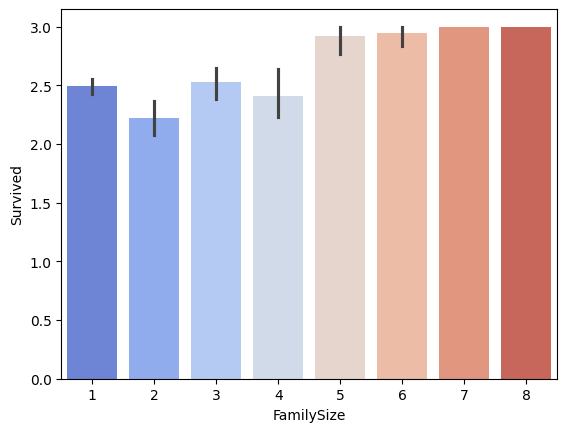

In [14]:
# Creating a Family Size Feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
sns.barplot(x="FamilySize", y="Survived", data=df, palette="coolwarm")
plt.show()


In [16]:
df.to_csv("cleaned_titanic.csv", index=False)
